# Chapter 2: Probability


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.distributions as dist

print(torch.cuda.is_available())

False


## Multivariate Normal Distribution
\begin{equation}
\mathcal{N}(\boldsymbol{x} | \boldsymbol{\mu}, \boldsymbol{\beta}) = \sqrt{\frac{\operatorname{det}(\boldsymbol{\beta})}{(2 \pi)^{D/2}}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\beta}(\boldsymbol{x}-\boldsymbol{\mu})\right) \tag{3.19}
\end{equation}

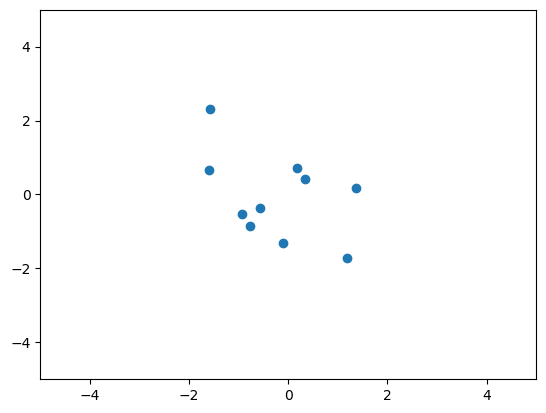

In [2]:
mu = torch.tensor([0, 1], dtype=torch.float32)

# covariance
def mvn_params(D):
    mu = torch.zeros(D)
    cov_matrix = torch.randn(D, D) / D
    cov_matrix = cov_matrix + cov_matrix.t() 
    torch.diagonal(cov_matrix).fill_(1.0)
    return mu, cov_matrix

D = 200
mu, cov = mvn_params(D)
mvn = dist.multivariate_normal.MultivariateNormal(loc=mu, covariance_matrix=cov)

# plot
x = mvn.sample((10,))

fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(x[:, 0], x[:, 1]) #, x[:, 2], c=x[:, 2])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

In [3]:
x.shape

torch.Size([10, 200])

In [4]:
mvn.covariance_matrix, D

(tensor([[ 1.0000e+00,  4.4514e-04,  1.1144e-02,  ...,  4.3807e-03,
           6.8573e-03,  9.0017e-03],
         [ 4.4514e-04,  1.0000e+00,  1.1307e-02,  ...,  7.2607e-03,
           3.2000e-03,  3.3639e-03],
         [ 1.1144e-02,  1.1307e-02,  1.0000e+00,  ..., -9.5952e-03,
          -9.9294e-03, -3.8874e-03],
         ...,
         [ 4.3807e-03,  7.2607e-03, -9.5952e-03,  ...,  1.0000e+00,
          -1.3511e-03,  7.4766e-03],
         [ 6.8573e-03,  3.2000e-03, -9.9294e-03,  ..., -1.3511e-03,
           1.0000e+00,  4.2416e-04],
         [ 9.0017e-03,  3.3639e-03, -3.8874e-03,  ...,  7.4766e-03,
           4.2416e-04,  1.0000e+00]]),
 200)

## 2.4 The Exponential Family

\begin{equation}
p(\boldsymbol{x} | \boldsymbol{\eta}) = \frac{1}{Z(\boldsymbol{\eta})}h(\boldsymbol{x})\exp[\boldsymbol{\eta}^\top\mathcal{T(\boldsymbol{x})}] \\
= h(\boldsymbol{x})\exp[\boldsymbol{\eta}^\top\mathcal{T(\boldsymbol{x})} - A(\boldsymbol{\eta})]
\end{equation}

## 2.5.3 Probability Integral Transform (PIF)

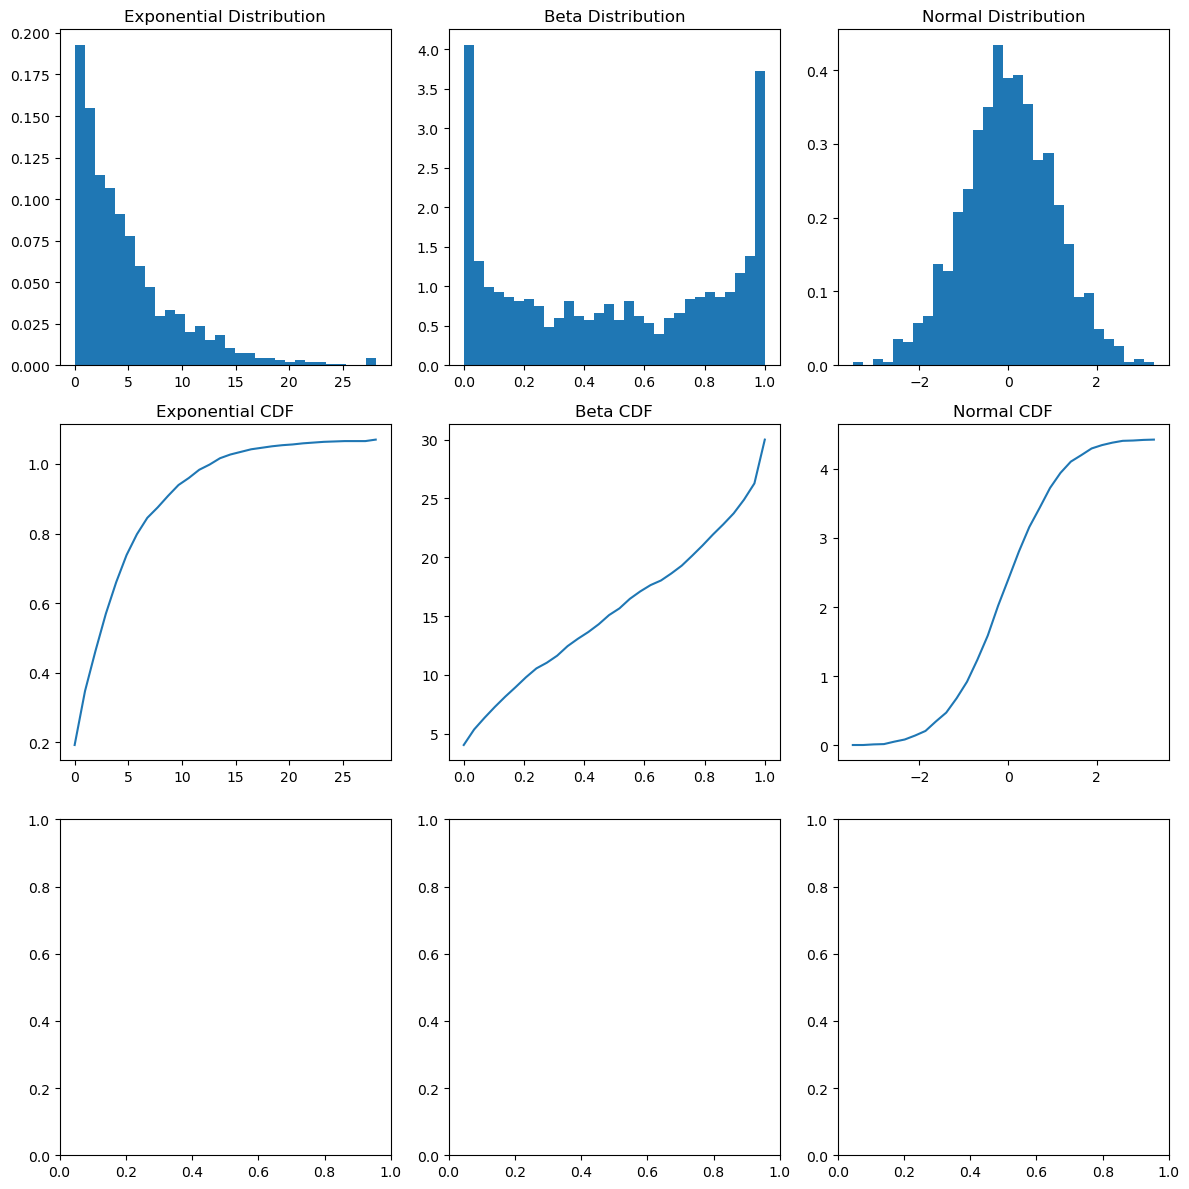

In [5]:
torch.manual_seed(1337)

# Exponential distribution with parameter 5
exp_dist = dist.exponential.Exponential(1 / 5)

# Beta distribution with parameters [0.5, 0.5]
beta_dist = dist.beta.Beta(torch.tensor([0.5]), torch.tensor([0.5]))

# Normal distribution with parameters [0, 1]
normal_dist = dist.normal.Normal(0, 1)

# Generate samples from each distribution
samples_exp = exp_dist.sample((1000,))
samples_beta = beta_dist.sample((1000,))
samples_normal = normal_dist.sample((1000,))

# Plotting the distributions
fig, axes = plt.subplots(3,3, figsize=(12, 12))

# Exponential dist
hist_exp = axes[0,0].hist(samples_exp.numpy(), bins=30, density=True)
axes[0,0].set_title('Exponential Distribution')

axes[1,0].plot(np.linspace(hist_exp[1][0], hist_exp[1][-1], len(hist_exp[0])), np.cumsum(hist_exp[0]))
axes[1,0].set_title('Exponential CDF')

# Beta dist
hist_beta = axes[0,1].hist(samples_beta.numpy(), bins=30, density=True)
axes[0,1].set_title('Beta Distribution')

axes[1,1].plot(np.linspace(hist_beta[1][0], hist_beta[1][-1], len(hist_beta[0])), np.cumsum(hist_beta[0]))
axes[1,1].set_title('Beta CDF')

# Normal dist
hist_norm = axes[0,2].hist(samples_normal.numpy(), bins=30, density=True)
axes[0,2].set_title('Normal Distribution')

axes[1,2].plot(np.linspace(hist_norm[1][0], hist_norm[1][-1], len(hist_norm[0])), np.cumsum(hist_norm[0]))
axes[1,2].set_title('Normal CDF')

plt.tight_layout()
plt.show()

In [6]:
hist_exp[0], np.cumsum(hist_exp[0])

(array([0.19255338, 0.15511246, 0.11446228, 0.10697411, 0.09092802,
        0.07809108, 0.05990552, 0.0470686 , 0.02995274, 0.03316197,
        0.03102252, 0.02032508, 0.0235343 , 0.01497637, 0.01818561,
        0.01069741, 0.00748819, 0.00748819, 0.00427896, 0.00427897,
        0.00320922, 0.00213948, 0.00320923, 0.00213948, 0.00213948,
        0.00106974, 0.00106974, 0.        , 0.        , 0.00427897]),
 array([0.19255338, 0.34766584, 0.46212813, 0.56910224, 0.66003025,
        0.73812133, 0.79802685, 0.84509544, 0.87504819, 0.90821015,
        0.93923267, 0.95955774, 0.98309204, 0.99806841, 1.01625403,
        1.02695143, 1.03443962, 1.04192781, 1.04620677, 1.05048574,
        1.05369496, 1.05583444, 1.05904367, 1.06118315, 1.06332263,
        1.06439237, 1.06546211, 1.06546211, 1.06546211, 1.06974108]))

In [7]:
np.linspace(hist_exp[1][0], hist_exp[1][0], len(hist_exp[0]))

array([0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068])

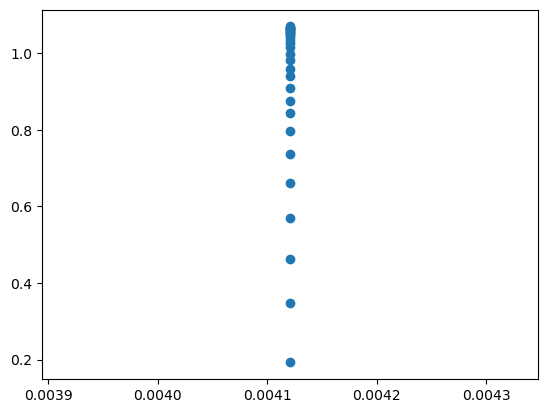

In [8]:
hst = hist_beta
plt.scatter(np.linspace(hist_exp[1][0], hist_exp[1][0], len(hist_exp[0])), np.cumsum(hist_exp[0]))

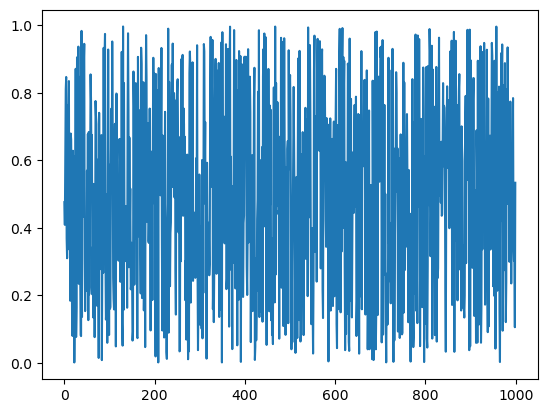

In [9]:
plt.plot(range(len(samples_exp)), exp_dist.cdf(samples_exp))

### 3.4.6.2 Robust (heavy-tailed) priors
To To motivate the use of robust priors, let us consider an example from [Ber85a, p7]. Suppose $x \sim \mathcal{N} (\theta, 1)$. We observe that $x = 5$ and we want to estimate $\theta$. The MLE is of course $\hat{\theta}= 5$, which seems reasonable. The posterior mean under a uniform prior is also θ = 5. But now suppose we know that the prior median is 0, and that there is 25% probability that θ lies in any of the intervals $(−\infty, −1)$, $(−1, 0)$,  (0, 1)$, $(1, \infty)$. Let us also assume the prior is smooth and unimodal.

One can show that a Gaussian prior of the form $\mathcal{N}(\theta\mid 0, 2.192)$ satisfies these prior constraints. But in this case the posterior mean is given by $3.43$, which doesn’t seem very satisfactory. An alternative
distribution that captures the same prior information is the Cauchy prior $\mathcal{T}_1 (\theta|\theta, 1)$. With this prior, we find (using numerical method integration: see [robust_prior_demo.ipynb](https://probml.github.io/notebooks#robust_prior_demo.ipynb) for the code) that the
posterior mean is about $4.6$, which seems much more reasonable. In general, priors with heavy tails
tend to give results which are more sensitive to the data, which is usually what we desire.

Text(0.5, 1.0, 'Normal Distribution')

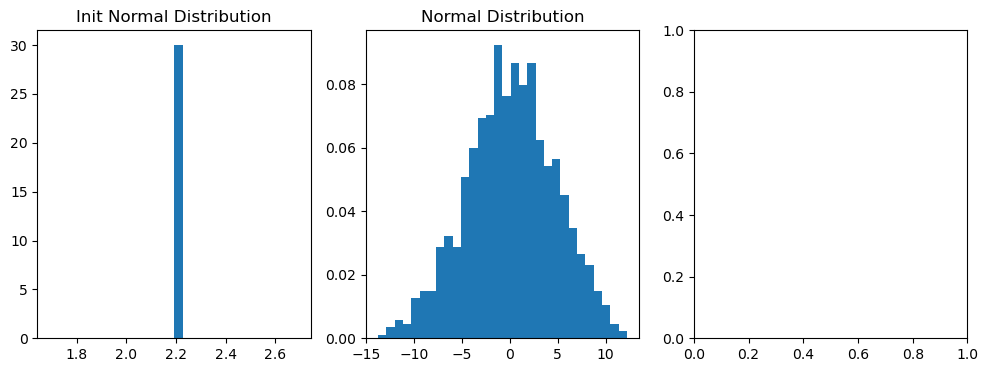

In [10]:
# Initial observation
mu0 = 5
var0 = 1
std0 = np.sqrt(var0)

N0 = dist.normal.Normal(mu0, std0)
N0_samples = normal_dist.sample((1,))

# Normal distribution with parameters [0, 1]
normal_dist = dist.normal.Normal(0, 2.19**2)

# Generate samples for the distribution
samples_normal = normal_dist.sample((1000,))

# plot the thing
fig, axes = plt.subplots(1,3, figsize=(12, 4))

hist_norm = axes[0].hist(N0_samples.numpy(), bins=30, density=True)
axes[0].set_title('Init Normal Distribution')

hist_norm = axes[1].hist(samples_normal.numpy(), bins=30, density=True)
axes[1].set_title('Normal Distribution')